In [150]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import time
url="https://www.cupoy.com/newsfeed/topicgrp/life_tw"
browser=webdriver.Chrome(executable_path="chromedriver")
browser.maximize_window()
browser.get(url)
time.sleep(5)
article=[]
href=[]
content=[]
sort=[]
Count=0
Fail_Count=0
while(Count<=500):
    if Count==0:
        browser.execute_script("window.scrollTo(0,470)")#初始化->16 item
    else:
        browser.execute_script("window.scrollTo(0,100000)")
    time.sleep(5)
    source=browser.page_source
    soup=BeautifulSoup(source)
    data=soup.find_all("div",class_="sc-eEieub sc-iuDHTM ibJqYc")
    for i in data:
        if i.find("h6",class_="sc-erNlkL sc-ekulBa hDLssh").text not in article:
            article.append(i.find("h6",class_="sc-erNlkL sc-ekulBa hDLssh").text)
            href.append(i.find("a").get('href'))
            content.append(i.find("p",class_="sc-FQuPU sc-ciodno bvnzOw").text)
            sort.append(i.find("div",class_="sc-gacfCG bPSpUf").text)
            Count+=1
        else:
            Fail_Count+=1
browser.close()

In [151]:
Sum={"標題":article,"分類":sort,"連結":href,"內文":content}
df=pd.DataFrame(Sum)
df

,標題,分類,連結,內文
0,如何讓寮國的「親職化兒童」放下超齡責任，無罪惡感快樂學習？ - The News Lens ...,育兒,https://www.thenewslens.com/article/131132,因為農忙而阻礙就學，反過來又會使未來的寮國欠缺能扛起國家發展重任的人力資源。如何擺脫惡性循環...
1,從防疫學英文：確診病例、潛伏期、隔離檢疫，英文怎麼說？ - The News Lens 關鍵評論網,醫療健康,https://www.thenewslens.com/article/131241,這波病毒來勢洶洶，若你有密切關注相關消息的話，想必一定經常聽到「感染、潛伏期、確診病例......
2,新手爸比媽咪~輕鬆訓練小朋友的主動性! - 天才領袖,育兒,https://www.leaderkid.com.tw/2020/02/16/%e6%96...,新手爸比媽咪~輕鬆訓練小朋友的主動性!
3,《知否》明蘭站著生孩子！不去醫院不躺牀上「溫柔生產」找回產婦醫療主體性 – 媽媽經｜專屬於媽...,育兒,https://mamaclub.com/learn/%e3%80%8a%e7%9f%a5%...,臺灣有句俗諺：「生得過，雞酒香；生不過，四塊板。」但面對分娩的緊張時刻，1500年前，中國古...
4,富貴手不再復發關鍵！3預防觀念告別破皮、流血 - BabyHome 新知大耳朵,美妝保養,https://info.babyhome.com.tw/article/21782?utm...,53歲的林先生從事園藝工作，工作需常常接觸水及化學肥料，近來發現手部皮膚反覆乾燥發紅搔癢、變...
...,...,...,...,...
507,【星座運勢】壞壞惹人愛的星座女 – 媽媽經｜專屬於媽媽的網站,育兒,https://mamaclub.com/learn/%e3%80%90%e6%98%9f%...,不要以為只有越壞的男生越會有人愛，其實有點壞壞的女生更吸引人的目光，而又是哪些星座最容易出現...
508,身為父母，也需要學習欣賞比自己更優秀的家長。 – 媽媽經｜專屬於媽媽的網站,育兒,https://mamaclub.com/learn/%e8%ba%ab%e7%82%ba%...,收藏文章自從日本媽咪替老公、孩子準備的便當盒，變成食譜曝光後，熊貓造型的飯糰與章魚造型的炸熱...
509,黃瑽寧：雙語早教，該注意的六件事/學前兒/教養/2019-03-28/親子天下,育兒,http://user78988.psee.io/NJXXF,以研究實證為湯底，父母之愛為佐料。黃瑽寧以為人父、人夫角度，從睡眠模式、安全依附、語言發展、...
510,牀頭吵牀尾和！越吵越恩愛的星座配對 – 媽媽經｜專屬於媽媽的網站,育兒,https://mamaclub.com/learn/%e5%ba%8a%e9%a0%ad%...,再恩愛的伴侶也難免因大事小事而產生衝突。有了矛盾，當然就要想辦法解決，而爭吵也是疏通的過程中...


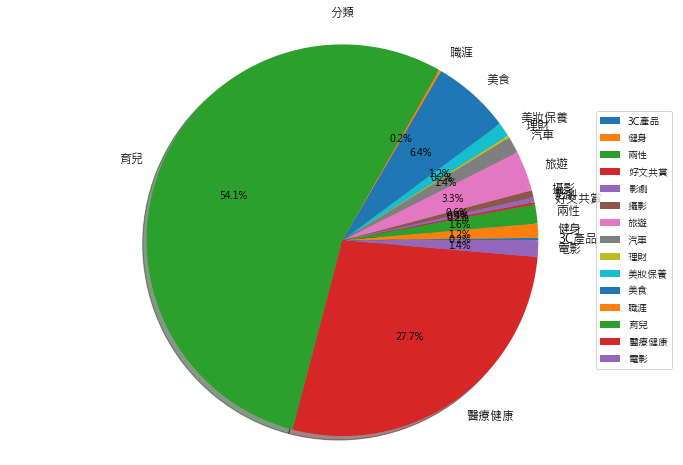

In [155]:
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties
a=df.groupby("分類")
size=a.size()
size=pd.DataFrame(size,columns=["Count"])
size=size.reset_index()
plt.figure(figsize=(12,8))    # 顯示圖框架大小
labels = size["分類"]      # 製作圓餅圖的類別標籤
pictures,category_text,percent_text=plt.pie(size["Count"],                           # 數值
                                            labels = labels,                # 標籤
                                            autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
                                         #   explode = separeted,            # 設定分隔的區塊位置
                                            pctdistance = 0.6,              # 數字距圓心的距離
                                            textprops = {"fontsize" : 20 },#大小
                                            shadow=True)                    # 設定陰影
Font=FontProperties("Microsoft JhengHei")
for i in category_text:
    i.set_fontproperties(Font)
    i.set_size(12)
for i in percent_text:
    i.set_fontproperties(Font)
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("分類", x=0.5,fontproperties=Font,fontsize= 12)  # 設定標題及其文字大小
plt.legend(loc = "right", prop=Font,fontsize= 12)
plt.show()# 設定圖例及其位置為最佳